In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import datetime

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

%matplotlib notebook 

In [48]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        if len(cities) < 501: # if len(cities) < 5 for test 429 error code
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

501

In [50]:
#define variables
base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key 
record_counter = 0
set_counter = 1

#define objects
new_cities = [] #for 404 weather info not found error 
country = []
lat = []
lng = [] 
date = [] 
cloudiness = [] 
humidity = []
max_temp = [] 
wind = []
 
print(f"Beginning Data Retrieval \n-----------------------------") 

for city in cities:
    query_url = base_url + "&q=" + city
    resp_data = requests.get(query_url).json() #request weather data   

    if record_counter < 50:
        record_counter += 1
    else:
        record_counter = 0 
        set_counter += 1  
        
    print('Processing Record {} of Set {} | {}'.format(record_counter, set_counter, city)) 
    
    try: 
        new_cities.append(resp_data['name']) #city
        country.append(resp_data['sys']['country'])
        lat.append(resp_data['coord']['lat'])
        lng.append(resp_data['coord']['lon']) 
        date.append(datetime.date.fromtimestamp(resp_data['dt'])) #convert timestamp     
        cloudiness.append(resp_data['clouds']['all'])
        humidity.append(resp_data['main']['humidity'])
        max_temp.append(resp_data['main']['temp_max']) 
        wind.append(resp_data['wind']['speed']) 
    except:
        print("404 City Not Found!")
        pass
    

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | sterling
Processing Record 3 of Set 1 | wajima
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | mandalgovi
Processing Record 7 of Set 1 | amderma
404 City Not Found!
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | yangliuqing
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | tingo maria
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | kazachinskoye
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | micheweni
Processing Record 22 of Set 1 | kontagora
Processing Record 23 of Set 

Processing Record 39 of Set 4 | yatou
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | imeni poliny osipenko
Processing Record 43 of Set 4 | falealupo
404 City Not Found!
Processing Record 44 of Set 4 | flinders
Processing Record 45 of Set 4 | caconde
Processing Record 46 of Set 4 | rovinj
Processing Record 47 of Set 4 | ust-kalmanka
Processing Record 48 of Set 4 | buraydah
Processing Record 49 of Set 4 | phan rang
404 City Not Found!
Processing Record 50 of Set 4 | toliary
404 City Not Found!
Processing Record 0 of Set 5 | kapaa
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | russell
Processing Record 3 of Set 5 | beeville
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | singaraja
Processing Record 6 of Set 5 | kuytun
Processing Record 7 of Set 5 | punta alta
Processing Record 8 of Set 5 | araci
Processing Record 9 of Set 5 | paraiso
Processing Record 10 of Set 5 | so

Processing Record 27 of Set 8 | martil
Processing Record 28 of Set 8 | morant bay
Processing Record 29 of Set 8 | vallenar
Processing Record 30 of Set 8 | bayangol
Processing Record 31 of Set 8 | mumbwa
Processing Record 32 of Set 8 | quatre cocos
Processing Record 33 of Set 8 | kamenka
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | terney
Processing Record 36 of Set 8 | khormuj
404 City Not Found!
Processing Record 37 of Set 8 | warrington
Processing Record 38 of Set 8 | nushki
Processing Record 39 of Set 8 | bar harbor
Processing Record 40 of Set 8 | barbar
404 City Not Found!
Processing Record 41 of Set 8 | mackay
Processing Record 42 of Set 8 | la rioja
Processing Record 43 of Set 8 | talgar
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | spearfish
Processing Record 46 of Set 8 | sorvag
404 City Not Found!
Processing Record 47 of Set 8 | antalaha
Processing Record 48 of Set 8 | vila franca do campo
Processing Record 49 of Set 8 | sao joa

### Convert Raw Data to DataFrame

In [51]:
weather = { "City": new_cities, "Country": country, "Latitude": lat, "Longitude": lng, 
            "Date": date, "Cloudiness": cloudiness, "Humidity": humidity, "MaxTemp": max_temp, "WindSpeed": wind }
 
#weather_df = pd.DataFrame.from_dict(weather, orient='index') 
weather_df = pd.DataFrame(weather)
weather_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,MaxTemp,WindSpeed
0,Port Alfred,ZA,-33.5906,26.8910,2021-02-07,74,93,290.37,1.79
1,Sterling,US,39.0062,-77.4286,2021-02-07,20,59,272.15,4.12
2,Wajima,JP,37.4000,136.9000,2021-02-07,75,80,272.15,2.57
3,Mataura,NZ,-46.1927,168.8643,2021-02-07,94,32,298.36,1.68
4,Mar del Plata,AR,-38.0023,-57.5575,2021-02-07,90,77,289.82,7.20


In [52]:
#export city data frame into csv
weather_df.to_csv("../Output/cities.csv", encoding = "UTF-8", index = False, header = True) 

In [53]:
# Inspect the data and remove the cities where the humidity > 100%.
humidity_df = weather_df['Humidity'].describe()
humidity_df

count    455.000000
mean      74.259341
std       18.332790
min       16.000000
25%       67.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [54]:
#  Get the indices of cities that have humidity over 100%.


In [55]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data

<IPython.core.display.Javascript object>


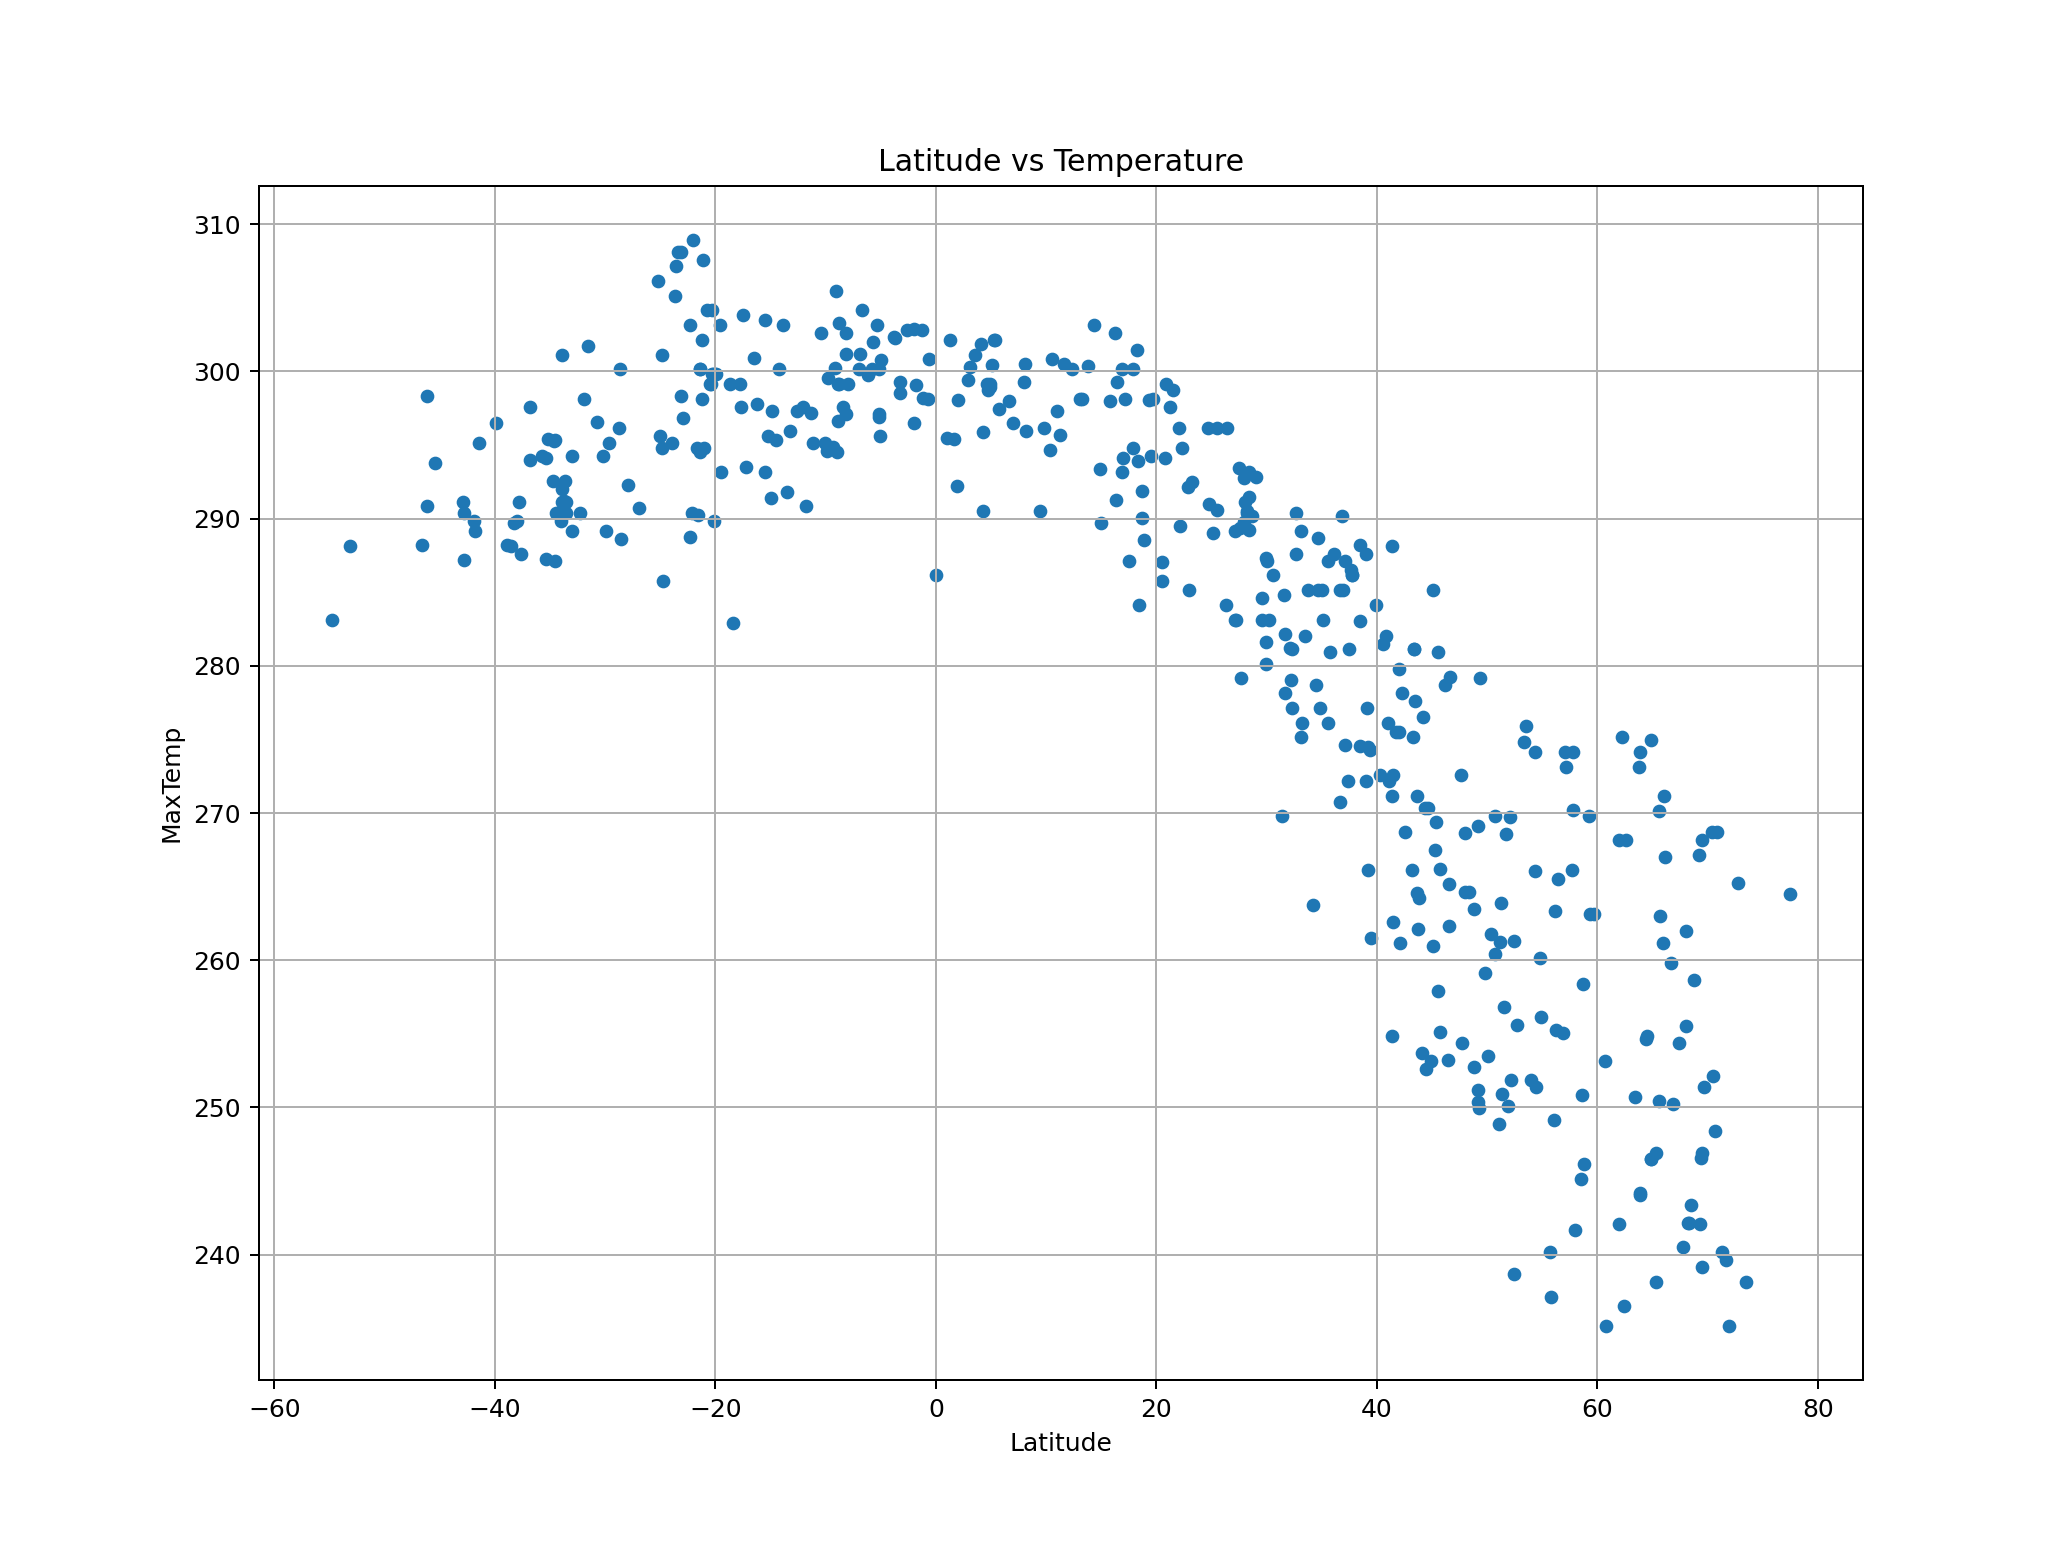

In [56]:
#Latitude vs. Temperature Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "MaxTemp", title = "Latitude vs Temperature").grid() 
plt.savefig("../Output/LatitudeVSTemperature.png")

<IPython.core.display.Javascript object>


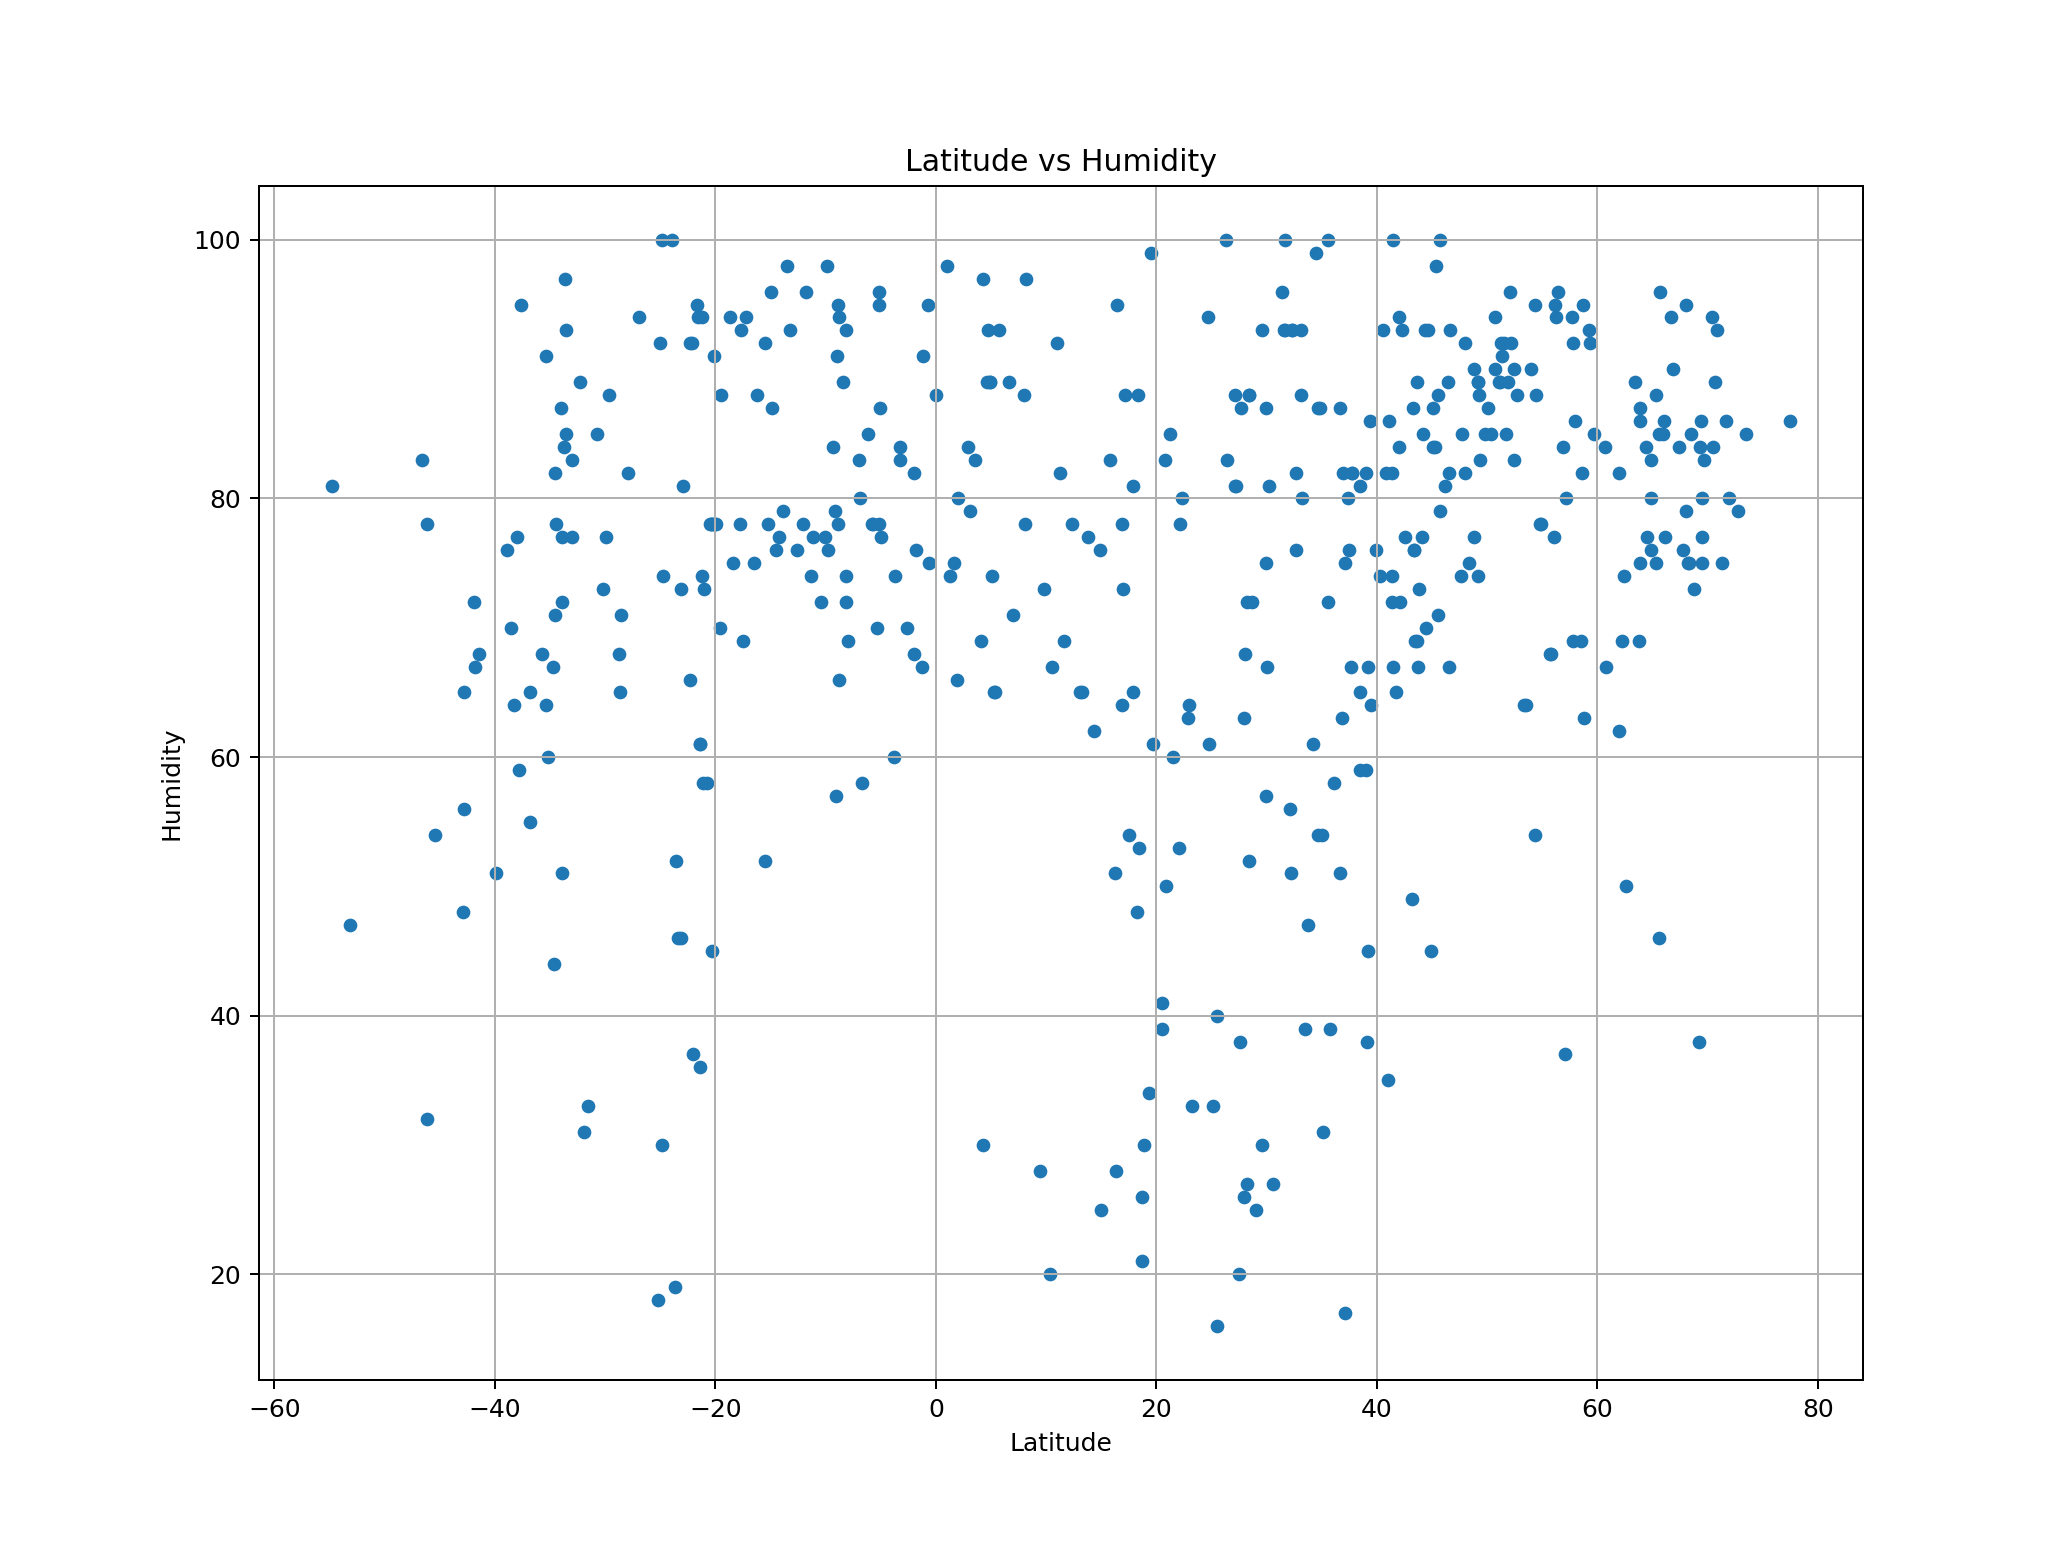

In [57]:
#Latitude vs. Humidity Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "Latitude vs Humidity").grid() 
plt.savefig("../Output/LatitudeVSHumidity.png")

<IPython.core.display.Javascript object>


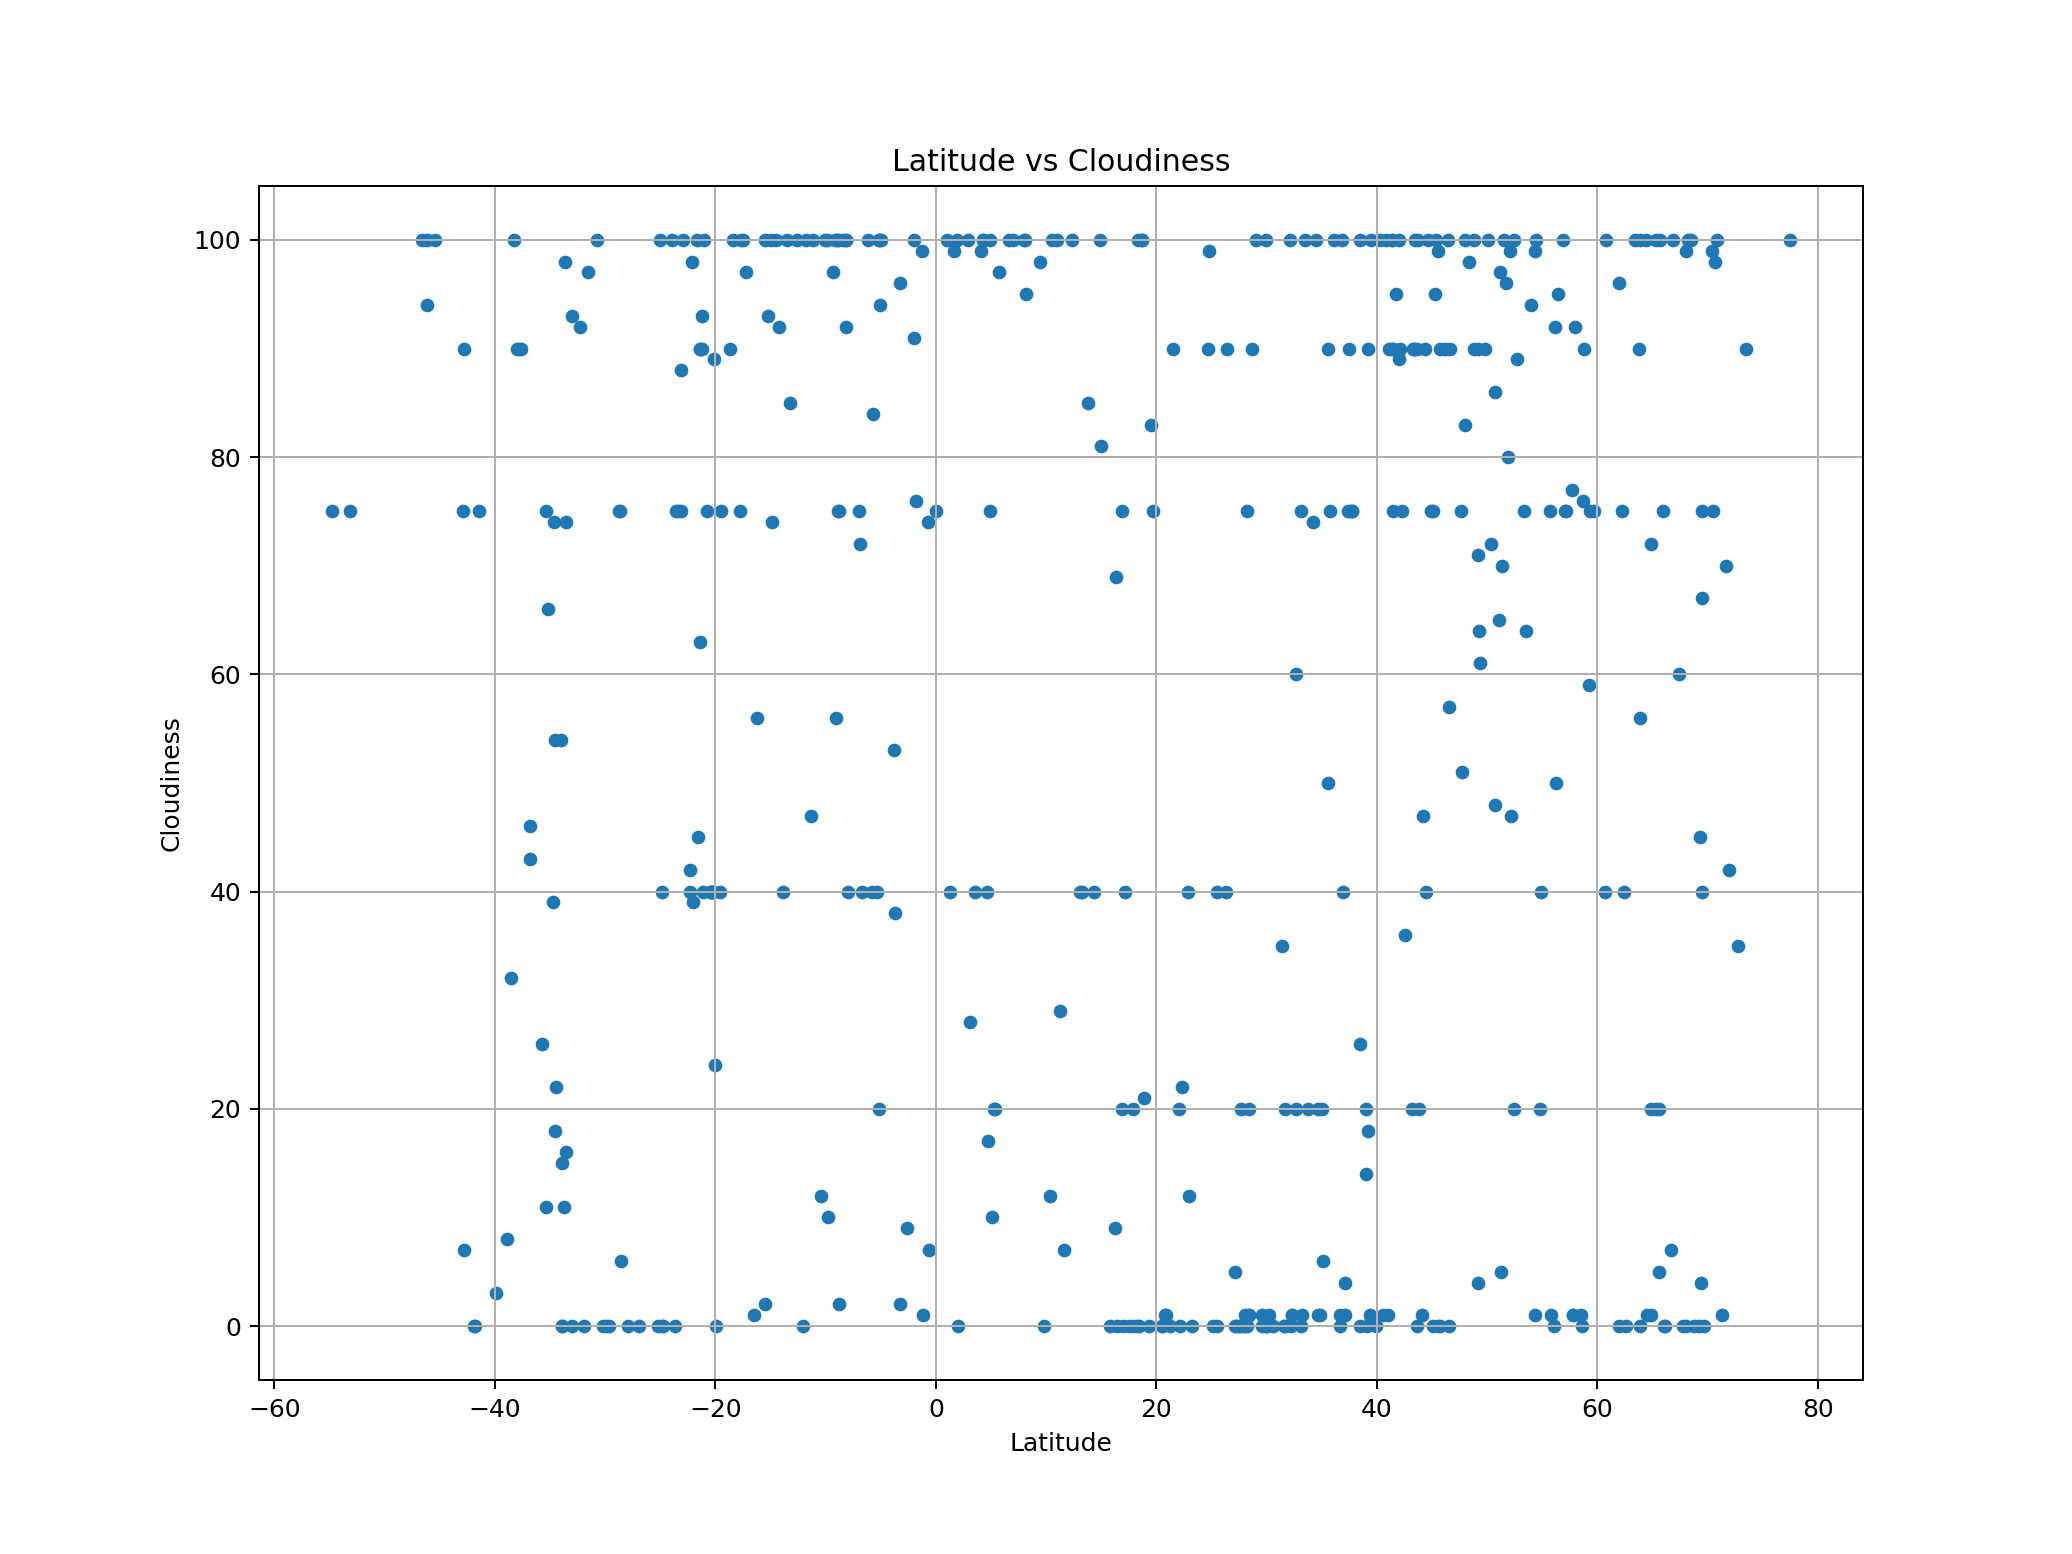

In [58]:
#Latitude vs. Cloudiness Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "Latitude vs Cloudiness").grid() 
plt.savefig("../Output/LatitudeVSCloudiness.png")

<IPython.core.display.Javascript object>


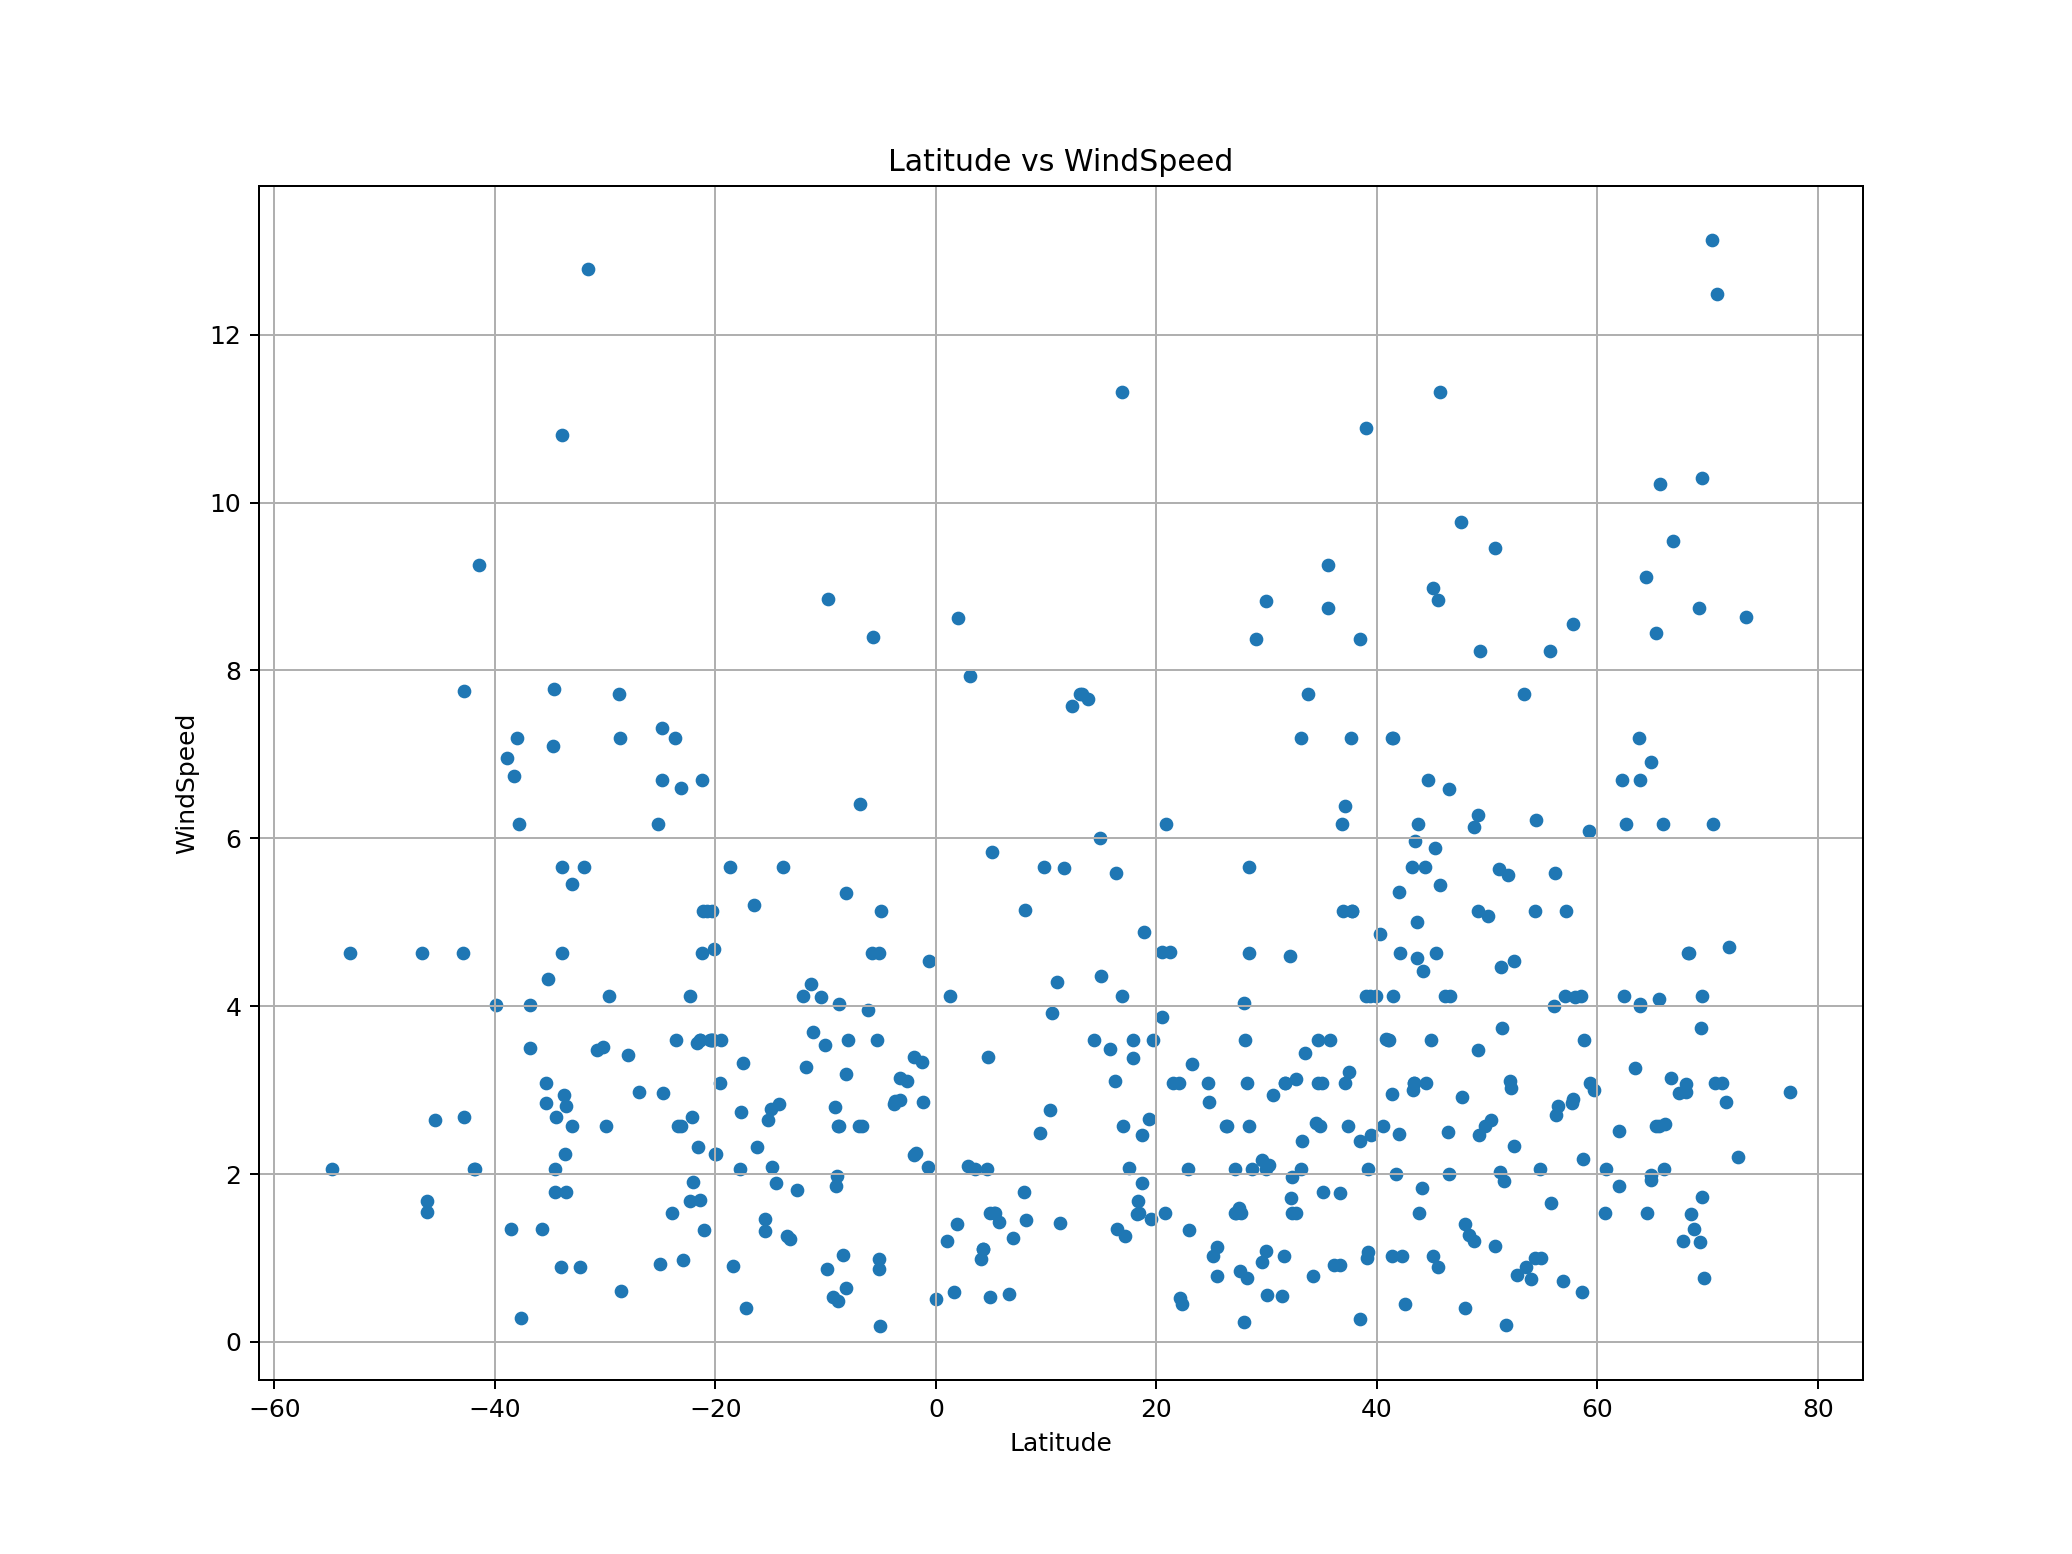

In [59]:
#Latitude vs. Wind Speed Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "WindSpeed", title = "Latitude vs WindSpeed").grid() 
plt.savefig("../Output/LatitudevsWindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression